In [14]:
#pip3 install -U scikit-learn scipy matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import sweetviz as sv



In [2]:
perf_treatment = pd.read_csv("data/PerfTreatments.csv", parse_dates=['ActivityDate'])

In [4]:
perf_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   EPAssetsId        961054 non-null  int64         
 1   ProdPeriod        961054 non-null  datetime64[ns]
 2   ProdType          961054 non-null  object        
 3   Volume            961054 non-null  float64       
 4   WellHeader.Match  961054 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 36.7+ MB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445271 entries, 0 to 445270
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   EPAssetsId         445271 non-null  int64         
 1   EPAPTId            445271 non-null  int64         
 2   ObservationNumber  370719 non-null  float64       
 3   ActivityDate       445271 non-null  datetime64[ns]
 4   ActivityType       445225 non-null  object        
 5   IntervalTop        445271 non-null  float64       
 6   IntervalBase       445271 non-null  float64       
 7   PerfShots          370719 non-null  float64       
 8   WellHeader.Match   445271 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 30.6+ MB


In [5]:
perf_treatment['ActivityType'] = perf_treatment['ActivityType'].astype('category')

In [6]:
perf_treatment=perf_treatment.iloc[:,0:8]

In [7]:
perf_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445271 entries, 0 to 445270
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   EPAssetsId         445271 non-null  int64         
 1   EPAPTId            445271 non-null  int64         
 2   ObservationNumber  370719 non-null  float64       
 3   ActivityDate       445271 non-null  datetime64[ns]
 4   ActivityType       445225 non-null  category      
 5   IntervalTop        445271 non-null  float64       
 6   IntervalBase       445271 non-null  float64       
 7   PerfShots          370719 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 24.2 MB


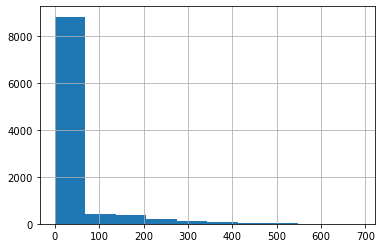

In [9]:
hist1=perf_treatment.groupby('EPAssetsId').count().sort_values(by='PerfShots',ascending=False)
hist1['PerfShots'].hist()

In [10]:
perf_treatment1=perf_treatment.loc[ :,['EPAssetsId', 'ActivityDate', 'ActivityType', 'PerfShots'] ]

,EPAssetsId,ActivityDate,ActivityType,PerfShots
0,2598013,2017-01-19,Perforation,20.0
1,2599020,2017-01-18,Perforation,20.0
2,2585063,2015-02-14,Perforation,20.0
3,2589680,2015-11-08,Perforation,20.0
4,2590441,2016-08-09,Perforation,20.0
...,...,...,...,...
445266,2588444,2015-09-13,Multi-Stage Fracture,0.0
445267,2609973,2018-02-18,Multi-Stage Fracture,0.0
445268,2600493,2017-09-16,Multi-Stage Fracture,0.0
445269,2595389,2016-09-12,Multi-Stage Fracture,0.0


In [33]:
perf_plot=perf_treatment1.groupby(['ActivityType']).count().sort_values('ActivityDate',ascending=False).reset_index()[['ActivityType','EPAssetsId']]
perf_plot.columns=['ActivityType','Number of Acitvities']
top10_activities=perf_plot.iloc[0:10]
perf_plot['Number of Acitvities'].sum()

445225

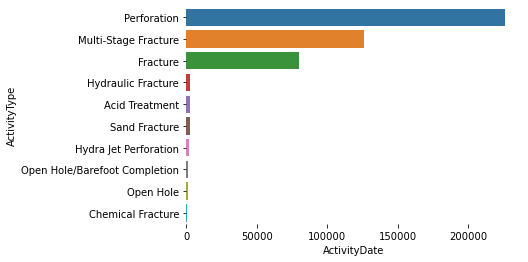

In [25]:
sns.barplot(x='ActivityDate',y='ActivityType', data=top10_activities, order=top10_activities['ActivityType'])
sns.despine(left=True, bottom=True)

In [57]:
perf_plot2=perf_plot.reset_index()
#perf_plot2['ActivityDate'].fillna(0,inplace=True)
#perf_plot2['PerfShots'].fillna(0,inplace=True)
perf_plot2.reset_index()
perf_plot4=perf_plot2.dropna().sort_values('ActivityDate',ascending=[False])
perf_plot4.sample(10)


,EPAssetsId,ActivityType,ActivityDate,PerfShots
3888,41381,Fracture,32.0,0.0
3724,42850,Fracture,33.0,0.0
3822,42198,Perforation,32.0,0.0
3396,2622331,Multi-Stage Fracture,35.0,35.0
13976,2594872,Open Hole/Barefoot Completion,1.0,1.0
7139,2596688,Multi-Stage Fracture,20.0,20.0
14304,1166697,Sand Fracture,1.0,0.0
1256,2603282,Perforation,71.0,71.0
2946,41359,Fracture,38.0,0.0
9702,38912,Open Hole,1.0,0.0


In [58]:
perf_plot5=perf_plot4.sort_values('ActivityDate',ascending=[False])
perf_plot5

,EPAssetsId,ActivityType,ActivityDate,PerfShots
0,2600761,Perforation,618.0,618.0
1,2601039,Perforation,604.0,604.0
2,2597868,Perforation,601.0,601.0
3,2597875,Perforation,586.0,586.0
4,2603285,Perforation,581.0,581.0
...,...,...,...,...
15169,1168911,Sand Fracture,1.0,0.0
15170,1168910,Sand Fracture,1.0,0.0
15171,1168908,Hydraulic Fracture,1.0,0.0
15163,1168956,Hydraulic Fracture,1.0,0.0


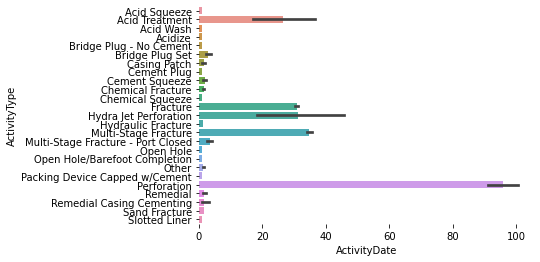

In [59]:
import seaborn as sns
import matplotlib.pylab as plt

sns.barplot(x='ActivityDate',y='ActivityType', data=perf_plot5)
sns.despine(left=True, bottom=True)

#sns.barplot(x='Id', y="Speed", data=df, order=result['Id'])
#order=df.sort_values('Salary').Education)

In [60]:
## groupby original production table 
perf_pivot_eachwell_10 = perf_plot.groupby(by=['EPAssetsId'],as_index=False, observed=True).agg({'ActivityType':'count','ActivityDate':'count', 'PerfShots': 'sum'})

perf_pivot_eachwell_10


,ActivityType,ActivityDate,PerfShots
0,25,2,0.0
1,25,2,0.0
2,25,2,0.0
3,25,3,0.0
4,25,3,0.0
...,...,...,...
10103,25,1,44.0
10104,25,1,41.0
10105,25,1,45.0
10106,25,2,26.0


In [61]:
## groupby original production table 
perf_pivot_eachwell_10 = perf_plot.groupby(by=['EPAssetsId'],as_index=True, observed=True).agg({'ActivityType':'count','ActivityDate':'count', 'PerfShots': 'sum'})

perf_pivot_eachwell_10


,ActivityType,ActivityDate,PerfShots
EPAssetsId,,,
3373,25,2,0.0
6976,25,2,0.0
6977,25,2,0.0
7129,25,3,0.0
7130,25,3,0.0
...,...,...,...
2624626,25,1,44.0
2624627,25,1,41.0
2624628,25,1,45.0


In [63]:
perf3=perf_pivot_eachwell_10.reset_index()
perf3

,EPAssetsId,ActivityType,ActivityDate,PerfShots
0,3373,25,2,0.0
1,6976,25,2,0.0
2,6977,25,2,0.0
3,7129,25,3,0.0
4,7130,25,3,0.0
...,...,...,...,...
10103,2624626,25,1,44.0
10104,2624627,25,1,41.0
10105,2624628,25,1,45.0
10106,2624670,25,2,26.0


In [64]:
perf4=perf3.drop(['EPAssetsId','ActivityType', 'ActivityDate'], axis=1)
#g2.drop(g2.columns[0], axis=1)
perf4

,PerfShots
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
10103,44.0
10104,41.0
10105,45.0
10106,26.0


In [65]:
perf_plot5

,EPAssetsId,ActivityType,ActivityDate,PerfShots
0,2600761,Perforation,618.0,618.0
1,2601039,Perforation,604.0,604.0
2,2597868,Perforation,601.0,601.0
3,2597875,Perforation,586.0,586.0
4,2603285,Perforation,581.0,581.0
...,...,...,...,...
15169,1168911,Sand Fracture,1.0,0.0
15170,1168910,Sand Fracture,1.0,0.0
15171,1168908,Hydraulic Fracture,1.0,0.0
15163,1168956,Hydraulic Fracture,1.0,0.0


In [66]:
#perf_plot6=perf_plot5.groupby('ActivityType').ActivityDate. agg(['count','mean','sum','min','max']).reset_index()
perf_plot6=perf_plot5.groupby(["ActivityType"])['ActivityDate']. agg(np.mean).reset_index().sort_values('ActivityDate',ascending=[False])
#'mean','sum','min','max'
perf_plot6

,ActivityType,ActivityDate
20,Perforation,95.887993
14,Multi-Stage Fracture,34.851258
12,Hydra Jet Perforation,31.393443
11,Fracture,30.805609
1,Acid Treatment,26.437500
15,Multi-Stage Fracture - Port Closed,3.400000
5,Bridge Plug Set,2.954545
8,Cement Squeeze,1.800000
22,Remedial Casing Cementing,1.750000
21,Remedial,1.666667


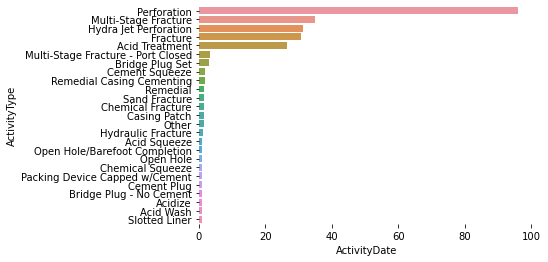

In [67]:
sns.barplot(x='ActivityDate',y='ActivityType', data=perf_plot6, order=perf_plot6['ActivityType'] )
sns.despine(left=True, bottom=True)

<Figure size 842.4x595.44 with 0 Axes>

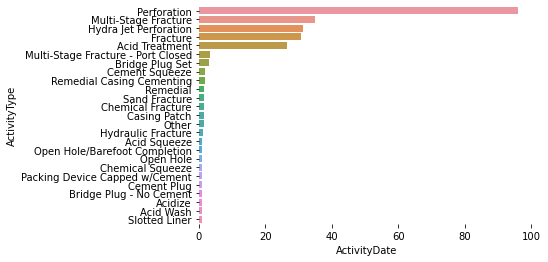

In [68]:
plt.gcf().set_size_inches(11.7, 8.27)
plt.figure()
perf_bar_h1=sns.barplot(x='ActivityDate',y='ActivityType', data=perf_plot6, order=perf_plot6['ActivityType'] )
sns.despine(left=True, bottom=True)
plt.savefig('perf_bar_h1.png')


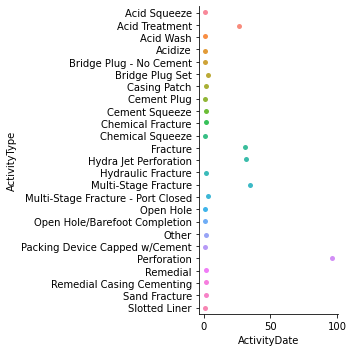

In [69]:
sns.catplot(x="ActivityDate", y="ActivityType", data=perf_plot6);

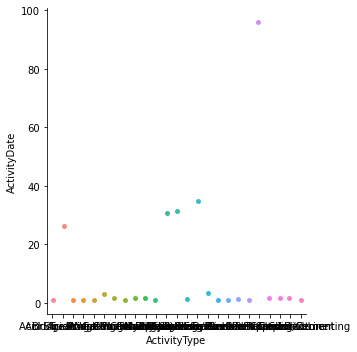

In [70]:
sns.catplot(x="ActivityType", y="ActivityDate", data=perf_plot6);

In [71]:
#perf_plot6=perf_plot5.groupby('ActivityType').ActivityDate. agg(['count','mean','sum','min','max']).reset_index()
perf_plot7=perf_treatment1.groupby(["ActivityType","EPAssetsId"]).count().reset_index(level=1)
#sort_values('ActivityDate',ascending=[False])
perf_plot7

,EPAssetsId,ActivityDate,PerfShots
ActivityType,,,
Acid Squeeze,3373,NaN,NaN
Acid Squeeze,6976,NaN,NaN
Acid Squeeze,6977,NaN,NaN
Acid Squeeze,7129,NaN,NaN
Acid Squeeze,7130,NaN,NaN
...,...,...,...
Slotted Liner,2624626,NaN,NaN
Slotted Liner,2624627,NaN,NaN
Slotted Liner,2624628,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

sns.catplot(x="ActivityType", y="ActivityDate", kind="swarm", data=perf_plot7.reset_index());

In [ ]:
plt.gcf().set_size_inches(11.7, 8.27)

In [ ]:
sns.catplot(x="ActivityDate",y="ActivityType", kind="swarm", data=perf_plot7.reset_index());

In [ ]:
plt.gcf().set_size_inches(11.7, 8.27)
sns.catplot(x="ActivityDate",y="ActivityType", kind="swarm", data=perf_plot7.reset_index());

In [ ]:
plt.gcf().set_size_inches(11.7, 8.27)
plt.figure()
perf_swarm_h1=sns.catplot(x="ActivityDate",y="ActivityType", kind="swarm", data=perf_plot7.reset_index());
plt.savefig('perf_swarm_h1.png')


In [ ]:
sns.catplot(x="ActivityType", y="ActivityDate", kind="violin", data=perf_plot7.reset_index());

In [ ]:
sns.catplot(x="ActivityDate",y="ActivityType", kind="violin", data=perf_plot7.reset_index());

In [ ]:
g = sns.catplot(x="ActivityType", y="ActivityDate", kind="violin", inner=None, data=perf_plot7.reset_index())
sns.swarmplot(x="ActivityType", y="ActivityDate", size=3, data=perf_plot7.reset_index(), ax=g.ax);

In [ ]:
g = sns.catplot(x="ActivityDate",y="ActivityType",  kind="violin", inner=None, data=perf_plot7.reset_index())
sns.swarmplot(x="ActivityDate",y="ActivityType", size=3, data=perf_plot7.reset_index(), ax=g.ax);

In [ ]:
plt.gcf().set_size_inches(11.7, 8.27)
plt.figure()
g = sns.catplot(x="ActivityDate",y="ActivityType",  kind="violin", inner=None, data=perf_plot7.reset_index())
perf_swarm_piano_h1=sns.swarmplot(x="ActivityDate",y="ActivityType", size=3, data=perf_plot7.reset_index(), ax=g.ax);
plt.savefig('perf_swarm_piano_h1.png')

In [ ]:
# create new dataframe with PerfTable for each well
perf_pivot_eachwell_1 = perf_plot.pivot_table(index=['EPAssetsId'], columns='ActivityType', values='ActivityDate', aggfunc=np.sum, observed=True)
perf_pivot_eachwell_1

In [ ]:
# create new dataframe with PerfTable for each well
perf_pivot_eachwell_2 = perf_plot.pivot_table(index=['EPAssetsId'], columns={'ActivityType', values='ActivityDate', aggfunc=np.sum, observed=True)
perf_pivot_eachwell_1

In [ ]:
perf_pivot_eachwell_1.columns.name = None
perf_pivot_eachwell_1.shape
#perf_pivot_eachwell_1

In [ ]:
perf_pivot_eachwell_1

In [ ]:
#perf_pivot_eachwell_1.info()

In [ ]:
print(type(perf_pivot_eachwell_1))

In [ ]:
g1=perf_pivot_eachwell_1['Acid Squeeze'].reset_index()
g1.drop(g1.tail(1).index,inplace=True)
gg=g1.reset_index(drop=True)
gg

In [ ]:
g2=perf_pivot_eachwell_1['Acid Treatment'].reset_index()
g2.drop(g2.tail(1).index,inplace=True)
g2=g2.reset_index(drop=True)
g22=g2.drop(g2.columns[0], axis=1)
g22

In [ ]:
g3=perf_pivot_eachwell_1['Acid Wash'].reset_index()
g3.drop(g3.tail(1).index,inplace=True)
g3=g3.reset_index(drop=True)
g33=g3.drop(g3.columns[0], axis=1)

In [ ]:
g4=perf_pivot_eachwell_1['Acidize'].reset_index()
g4.drop(g4.tail(1).index,inplace=True)
g4=g4.reset_index(drop=True)
g44=g4.drop(g4.columns[0], axis=1)

In [ ]:
g5=perf_pivot_eachwell_1['Bridge Plug - No Cement'].reset_index()
g5.drop(g2.tail(1).index,inplace=True)
g5=g5.reset_index(drop=True)
g55=g5.drop(g5.columns[0], axis=1)

g6=perf_pivot_eachwell_1['Bridge Plug Set'].reset_index()
g6.drop(g6.tail(1).index,inplace=True)
g6=g1.reset_index(drop=True)
g66=g6.drop(g6.columns[0], axis=1)

g7=perf_pivot_eachwell_1['Casing Patch'].reset_index()
g7.drop(g7.tail(1).index,inplace=True)
g7=g1.reset_index(drop=True)
g77=g7.drop(g7.columns[0], axis=1)

g8=perf_pivot_eachwell_1['Cement Plug'].reset_index()
g8.drop(g8.tail(1).index,inplace=True)
g8=g8.reset_index(drop=True)
g88=g8.drop(g8.columns[0], axis=1)

g9=perf_pivot_eachwell_1['Cement Squeeze'].reset_index()
g9.drop(g9.tail(1).index,inplace=True)
g9=g9.reset_index(drop=True)
g99=g9.drop(g9.columns[0], axis=1)

g10=perf_pivot_eachwell_1['Chemical Fracture'].reset_index()
g10.drop(g10.tail(1).index,inplace=True)
g10=g10.reset_index(drop=True)
g102=g10.drop(g10.columns[0], axis=1)

g11=perf_pivot_eachwell_1['Chemical Squeeze'].reset_index()
g11.drop(g11.tail(1).index,inplace=True)
g11=g11.reset_index(drop=True)
g112=g11.drop(g11.columns[0], axis=1)

g12=perf_pivot_eachwell_1['Fracture'].reset_index()
g12.drop(g2.tail(1).index,inplace=True)
g12=g12.reset_index(drop=True)
g122=g12.drop(g12.columns[0], axis=1)

g13=perf_pivot_eachwell_1['Hydra Jet Perforation'].reset_index()
g13.drop(g13.tail(1).index,inplace=True)
g13=g13.reset_index(drop=True)
g132=g13.drop(g13.columns[0], axis=1)

g14=perf_pivot_eachwell_1['Hydraulic Fracture'].reset_index()
g14.drop(g14.tail(1).index,inplace=True)
g14=g14.reset_index(drop=True)
g142=g14.drop(g14.columns[0], axis=1)

g15=perf_pivot_eachwell_1['Multi-Stage Fracture'].reset_index()
g15.drop(g15.tail(1).index,inplace=True)
g15=g15.reset_index(drop=True)
g152=g15.drop(g15.columns[0], axis=1)

g16=perf_pivot_eachwell_1['Multi-Stage Fracture - Port Closed'].reset_index()
g16.drop(g16.tail(1).index,inplace=True)
g16=g16.reset_index(drop=True)
g162=g16.drop(g16.columns[0], axis=1)

g17=perf_pivot_eachwell_1['Open Hole'].reset_index()
g17.drop(g17.tail(1).index,inplace=True)
g17=g17.reset_index(drop=True)
g172=g17.drop(g17.columns[0], axis=1)

g18=perf_pivot_eachwell_1['Open Hole/Barefoot Completion'].reset_index()
g18.drop(g18.tail(1).index,inplace=True)
g18=g18.reset_index(drop=True)
g182=g18.drop(g18.columns[0], axis=1)

g19=perf_pivot_eachwell_1['Other'].reset_index()
g19.drop(g19.tail(1).index,inplace=True)
g19=g19.reset_index(drop=True)
g192=g19.drop(g19.columns[0], axis=1)

g20=perf_pivot_eachwell_1['Packing Device Capped w/Cement'].reset_index()
g20.drop(g20.tail(1).index,inplace=True)
g20=g20.reset_index(drop=True)
g202=g20.drop(g20.columns[0], axis=1)

g21=perf_pivot_eachwell_1['Perforation'].reset_index()
g21.drop(g21.tail(1).index,inplace=True)
g21=g21.reset_index(drop=True)
g212=g21.drop(g21.columns[0], axis=1)

g22=perf_pivot_eachwell_1['Remedial'].reset_index()
g22.drop(g21.tail(1).index,inplace=True)
g22=g22.reset_index(drop=True)
g222=g22.drop(g22.columns[0], axis=1)

g23=perf_pivot_eachwell_1['Remedial Casing Cementing'].reset_index()
g23.drop(g23.tail(1).index,inplace=True)
g23=g23.reset_index(drop=True)
g232=g23.drop(g23.columns[0], axis=1)

g24=perf_pivot_eachwell_1['Sand Fracture'].reset_index()
g24.drop(g24.tail(1).index,inplace=True)
g24=g24.reset_index(drop=True)
g242=g24.drop(g24.columns[0], axis=1)

g25=perf_pivot_eachwell_1['Slotted Liner'].reset_index()
g25.drop(g25.tail(1).index,inplace=True)
g25=g25.reset_index(drop=True)
g252=g25.drop(g25.columns[0], axis=1)

In [ ]:
perf1=pd.concat([g1.reset_index(drop=True),g22.reset_index(drop=True),g33.reset_index(drop=True),g44.reset_index(drop=True),g55.reset_index(drop=True),g66.reset_index(drop=True),g77.reset_index(drop=True),g88.reset_index(drop=True),g99.reset_index(drop=True),g102.reset_index(drop=True),g112.reset_index(drop=True),g122.reset_index(drop=True),g132.reset_index(drop=True),g142.reset_index(drop=True),g152.reset_index(drop=True),g162.reset_index(drop=True),g172.reset_index(drop=True),g182.reset_index(drop=True),g192.reset_index(drop=True),g202.reset_index(drop=True),g212.reset_index(drop=True),g222.reset_index(drop=True),g232.reset_index(drop=True),g242.reset_index(drop=True),g252.reset_index(drop=True),perf4.reset_index(drop=True)], axis=1)
perf1

In [ ]:
t1=production_pivot_total_eachwell['Condensate Production (Bbls)'].reset_index()
t1.drop(t1.tail(1).index,inplace=True)
tt=t1.reset_index(drop=True)
#tt

In [ ]:
t2=production_pivot_total_eachwell['Gas Production (MMcf)'].reset_index()
t2.drop(t2.tail(1).index,inplace=True)
t2.reset_index(drop=True)
t22=t2.drop(t2.columns[0], axis=1)
#t22

In [ ]:
t3=production_pivot_total_eachwell['Oil Production (Bbls)'].reset_index()
t3.drop(t3.tail(1).index,inplace=True)
t3.reset_index(drop=True)
t33=t3.drop(t3.columns[0], axis=1)

In [ ]:
t4=production_pivot_total_eachwell['Water Production (Bbls)'].reset_index()
t4.drop(t4.tail(1).index,inplace=True)
t4.reset_index()
t44=t4.drop(t4.columns[0], axis=1)

In [ ]:
t5=production_pivot_total_eachwell['Production Hours'].reset_index()
t5.drop(t5.tail(1).index,inplace=True)
t5.reset_index(drop=True)
t55=t5.drop(t5.columns[0], axis=1)

In [ ]:
production1=pd.concat([t1.reset_index(drop=True),t22.reset_index(drop=True),t33.reset_index(drop=True),t44.reset_index(drop=True),t55.reset_index(drop=True)], axis=1)
production1

In [ ]:
production_perf=pd.merge(production1 ,perf1, on = 'EPAssetsId', how='left')
production_perf.fillna(0)

In [ ]:
## create perf activity type dictionary to classify as Completion Activity (Yes or No) based on our assumptions and intrepretation from AER directive 59 (Well Drilling and Completion Data Filing Requirements) pg 26-27 as Completion Operation types.

perf_activity_dict = {'Perforation': 'Yes',
 'Fracture': 'Yes',
 'Hydraulic Fracture': 'Yes',
 'Sand Fracture': 'Yes',
 'Open Hole': 'Yes',
 'Chemical Fracture': 'Yes',
 'Other' : 'No',
 'Acid Squeeze' : 'Yes',
 'Bridge Plug Set' : 'Yes',
 'Acid Wash' : 'Yes',
 'Acidize' : 'Yes',
 'Remedial' : 'Yes',
 'Cement Squeeze' : 'Yes',
'Hydra Jet Perforation': 'Yes',
 'Slotted Liner' : 'Yes',
 'Open Hole/Barefoot Completion' : 'Yes',
 'Remedial Casing Cementing' : 'Yes',
 'Cement Plug' : 'Yes',
 'Multi-Stage Fracture - Port Closed': 'Yes',
 'Bridge Plug - No Cement' : 'Yes',
 'Packing Device Capped w/Cement' : 'Yes',
 'Chemical Squeeze': 'Yes',
 'Casing Patch' : 'Yes',
 'Acid Treatment' : 'Yes',
 'Multi-Stage Fracture': 'Yes'}

print(perf_activity_dict)

In [ ]:
# merge new table to existing perftreatment table
perf_treatment['CompletionActivity'] = perf_treatment['ActivityType'].map(perf_activity_dict)

In [ ]:
perf_treatment.head()

In [ ]:

perf_treatment['CompletionActivity'] = perf_treatment['CompletionActivity'].astype('category')

perf_treatment['CompletionActivity'].unique()

In [ ]:
perf_treatment.info()

In [ ]:
perf_treatment.shape()